In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Import the data, set the index, and print the head of the data frame to see the parameters
df = pd.read_csv('day.csv')
df.set_index('instant', inplace=True)
print(df.head())

             dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        2011-01-01       1   0     1        0        6           0   
2        2011-01-02       1   0     1        0        0           0   
3        2011-01-03       1   0     1        0        1           1   
4        2011-01-04       1   0     1        0        2           1   
5        2011-01-05       1   0     1        0        3           1   

         weathersit      temp     atemp       hum  windspeed  casual  \
instant                                                                
1                 2  0.344167  0.363625  0.805833   0.160446     331   
2                 2  0.363478  0.353739  0.696087   0.248539     131   
3                 1  0.196364  0.189405  0.437273   0.248309     120   
4                 1  0.200000  0.212122  0.590435   0.160296     108   
5                 1  0.226957  0.229270  0.436957   0.186900      82  

In [28]:
# Convert the dteday column to datetime and check that the type converted
df['dteday'] = pd.to_datetime(df['dteday'])
print(df.dtypes)
print(df.temp.describe())
print(df.cnt.describe())

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


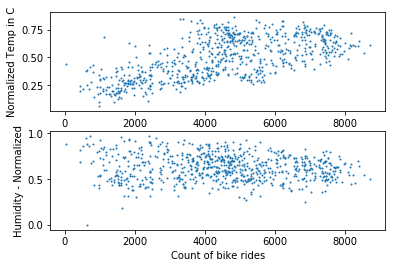

In [35]:
# See how temperature, humidity, and count of bike rides are related
plt.subplot(2, 1, 1)
plt.scatter(x=df['cnt'], y=df['temp'], s=1)
plt.xlabel('Count of bike rides')
plt.ylabel('Normalized Temp in C')
plt.subplot(2, 1, 2)
plt.scatter(x=df['cnt'], y=df['hum'], s=1)
plt.xlabel('Count of bike rides')
plt.ylabel('Humidity - Normalized')
plt.show()

There appears to be a stronger relationship between tempearture and number of riders than humidity and number of riders.  Further analysis would need to be done to see if this relationship is significant or not.  Possibly the humidity of the geographical region doesn't vary much.

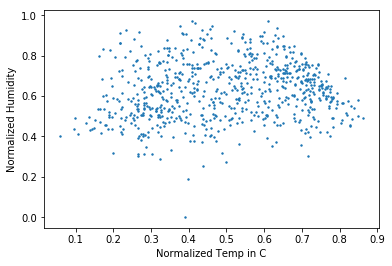

In [38]:
# See if temperature and humidity are related
plt.scatter(x=df['temp'], y=df['hum'], s=2)
plt.xlabel('Normalized Temp in C')
plt.ylabel('Normalized Humidity')
plt.show()

There doesn't appear to be a strong relationship between humidity and temperature.  It looks like it is usually humid in theis location except for 1 data point that is not humid.

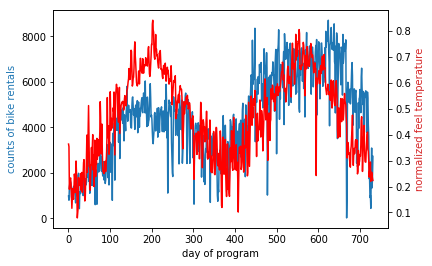

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.plot(df['cnt'], color=color)
ax1.set_xlabel('day of program')
ax1.set_ylabel('counts of bike rentals', color=color)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(df['atemp'], color='red')
ax2.set_ylabel('normalized feel temperature', color=color)
plt.show()

The previous plot appears to show that the number of bike rentals is related to the normalized feel temperature.  This could mean that fewer people want to rent bikes in winter (when the program started) or that more people are on vacation and can rent bikes in summer.  It also appears that more people rented bikes the second summer.  This could be because there were more bikes available or more awareness about the availability of the bikes the second year. 

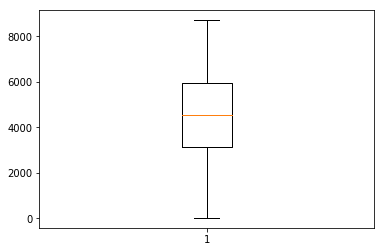

In [6]:
# Draw a boxplot
plt.boxplot(df['cnt'])
plt.show()

The boxplot shows no outliers.  Usually between 3000-6000 bike rides. The box shows the quartile ranges with the orange line at the mean.  

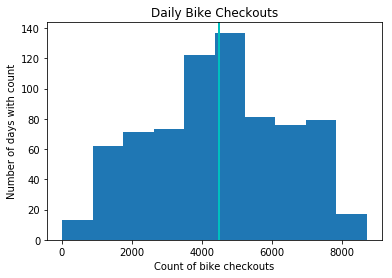

4504.35 is the mean number of bike checkouts.


In [27]:
# Daily count of bike rentals.  4000-6000 bike checkouts appear to be the most common.
plt.hist(df['cnt'])
plt.axvline(df.cnt.mean(), color='c', linewidth=2)
plt.title('Daily Bike Checkouts')
plt.xlabel('Count of bike checkouts')
plt.ylabel('Number of days with count')
plt.show()
print('{:0.2f} is the mean number of bike checkouts.'.format(df.cnt.mean()))

# Questions:
1. 

# For fun - playing around with correlation matrices

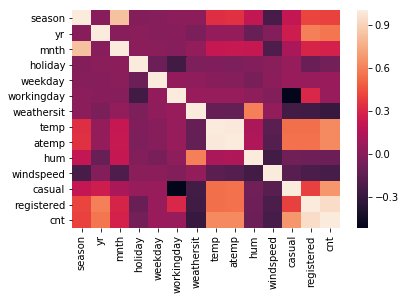

In [11]:
# Heat map can show parameters that should be looked at more closely
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

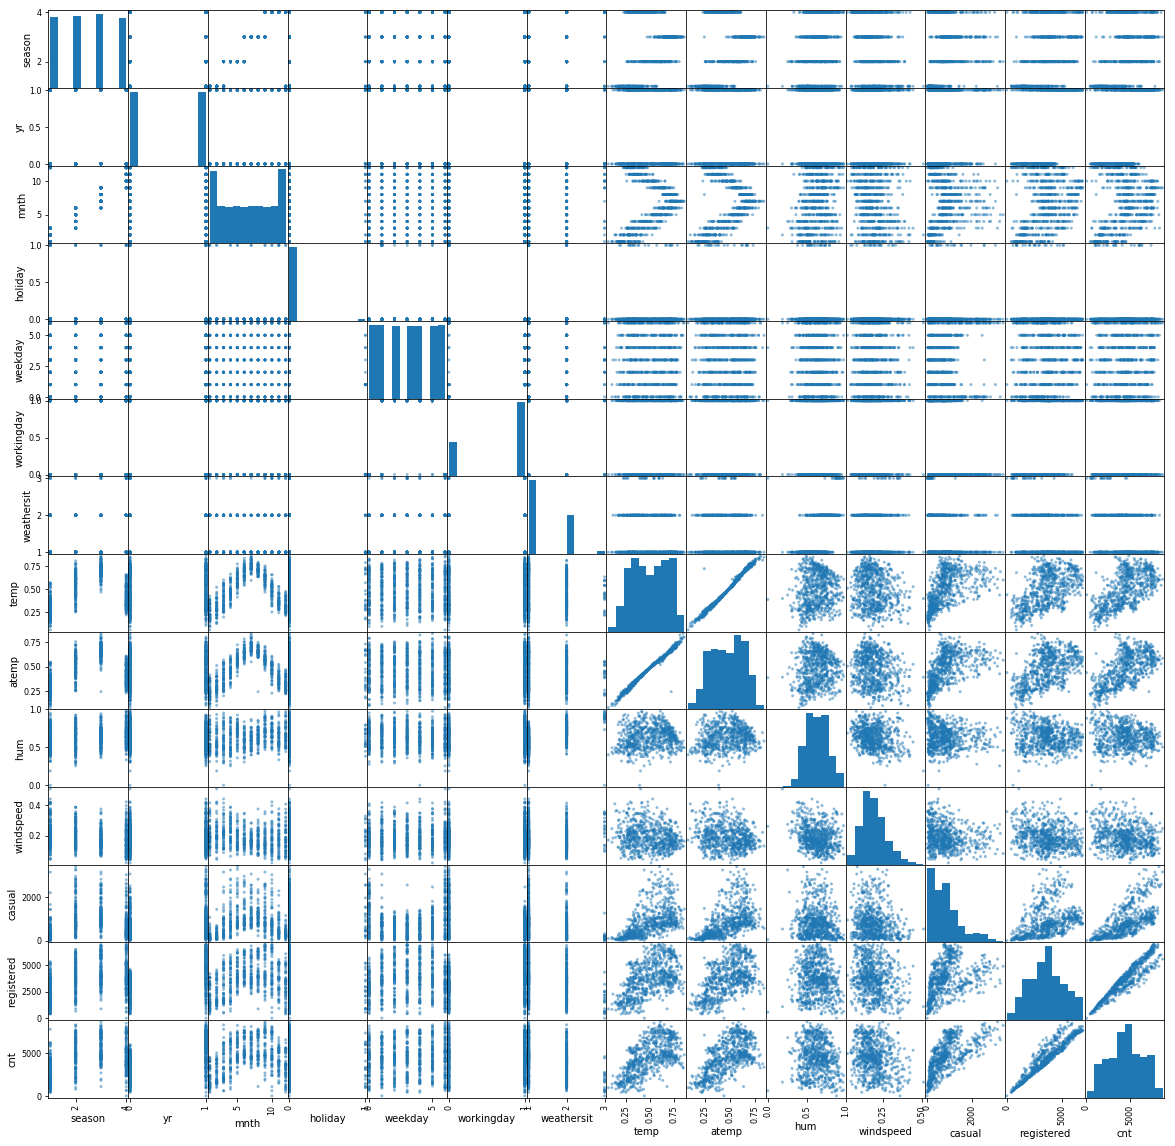

In [14]:
# Should limit this to only a few parameters that make sense
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

In [7]:
# Trying out grouping by month
df_month = df.groupby(by=[df.yr, df.mnth]).agg({'cnt': 'sum', 'temp': 'mean'})

In [8]:
print(df_month)

            cnt      temp
yr mnth                  
0  1      38189  0.197707
   2      48215  0.282540
   3      64045  0.331667
   4      94870  0.471188
   5     135821  0.577231
   6     143512  0.693083
   7     141341  0.758575
   8     136691  0.705362
   9     127418  0.612887
   10    123511  0.469976
   11    102167  0.402338
   12     87323  0.325182
1  1      96744  0.275181
   2     103137  0.315337
   3     164875  0.449411
   4     174224  0.468809
   5     195865  0.612366
   6     202830  0.675111
   7     203607  0.752366
   8     214503  0.711801
   9     218573  0.620083
   10    198841  0.500049
   11    152664  0.336101
   12    123713  0.322880
